<a href="https://colab.research.google.com/github/ezhil384/ezhil384/blob/main/Coswara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/iiscleap/Coswara-Data
%cd Coswara-Data

Cloning into 'Coswara-Data'...
remote: Enumerating objects: 613, done.
remote: Total 613 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (613/613), 12.54 GiB | 41.48 MiB/s, done.
Resolving deltas: 100% (222/222), done.
Checking out files: 100% (158/158), done.
/content/Coswara-Data


In [ ]:
import pandas as pd
df = pd.read_csv('combined_data.csv')
df.head()

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,cold,ht,diabetes,fever,asthma,um,cough,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia,ctScan,testType,test_date,vacc,ctDate,ctScore,others_resp,others_preexist
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!python extract_data.py

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


All your files from Mydrive

In [3]:
%cd gdrive/My Drive
! ls

/content/gdrive/My Drive
'2019A7PS0050_Abhiraj E.pdf'
 2019A7PS0050case.docx
 2019A7PS0050P
'2019A7PS0050P abhiraj E.pdf'
 2019A7PS0050P_GraduationMarksheet.pdf
'2019A7PS0050P GSF312.pdf'
 2019A7PS0050P_HSCMarksheet.jpg
 2019A7PS0050P.java
 2019A7PS0050PM3.pdf
'2019A7PS0050P maths t3.pdf'
'2019A7PS0050P mupl1.pdf'
 2019A7PS0050P.pdf
'2019A7PS0050P q12.pdf'
'2019A7PS0050P q34.pdf'
'2019A7PS0050P q56.pdf'
'2019A7PS0050P_SSC Marksheet.jpg'
 2019A7PS0050P_T12.pdf
'2019A7PS0050P_T21 (1).pdf'
 2019A7PS0050P_T21.pdf
'20210524_175733 (1).jpg'
 20210524_175733.jpg
 20210524_175903.jpg
 34R
 35R
'3 Assignment Submission Template.docx'
'Abhiraj E_2019A7PS0050P_EDCC_SemI_2020-21.docx'
'ABHIRAJ E_2019A7PS0050P_SSA (1).docx'
'ABHIRAJ E_2019A7PS0050P_SSA.docx'
'ABHIRAJ E_2019A7PS0050P_Test 3 (1).docx'
'ABHIRAJ E_2019A7PS0050P_Test 3 (2).docx'
'ABHIRAJ E_2019A7PS0050P_Test 3 (3).docx'
'ABHIRAJ E_2019A7PS0050P_Test 3 (4).docx'
'ABHIRAJ E_2019A7PS0050P_Test 3.docx'
'Adobe Scan 12 Oct 2020.pdf'
'Adobe Sc

# Librosa 
Plotting the visual image of the wave form of the audio file - helps in running CNN classifiers

Text(0.5, 1.0, 'Input cough signal')

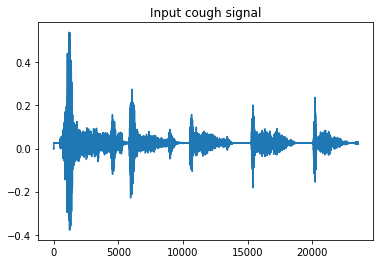

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import sys
#Visualize cough signal
file = "35_35.wav"
x,fs = librosa.load(file, sr=None)
plt.plot(x)
plt.title("Input cough signal")

# Audio file
Running the audio file on google colab using wavfile and Audio. Make sure that the file is in .wav format

In [9]:
from IPython.display import Audio
from scipy.io import wavfile
# Load the file on an object
data = wavfile.read('35_35.wav')

# Separete the object elements
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')
Audio(sounddata,rate=framerate)

Sample rate: 11025 Hz
Total time: 2.136235827664399 s


# New Section